In [1]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=1000):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [3]:
init = time.time()
dirin = os.path.join("..", "..", "Data")

fileinprefix = "LGND_200_Export_part1.csv"
df_neutronsGS = load_dataframe_from_files(dirin, fileinprefix)

print("[Info] Loaded data in {:.3f} seconds".format(time.time() - init))

[Info] Loading 1 files wt prefix:
LGND_200_Export_part1.csv

[Info] Loaded data in 0.026 seconds


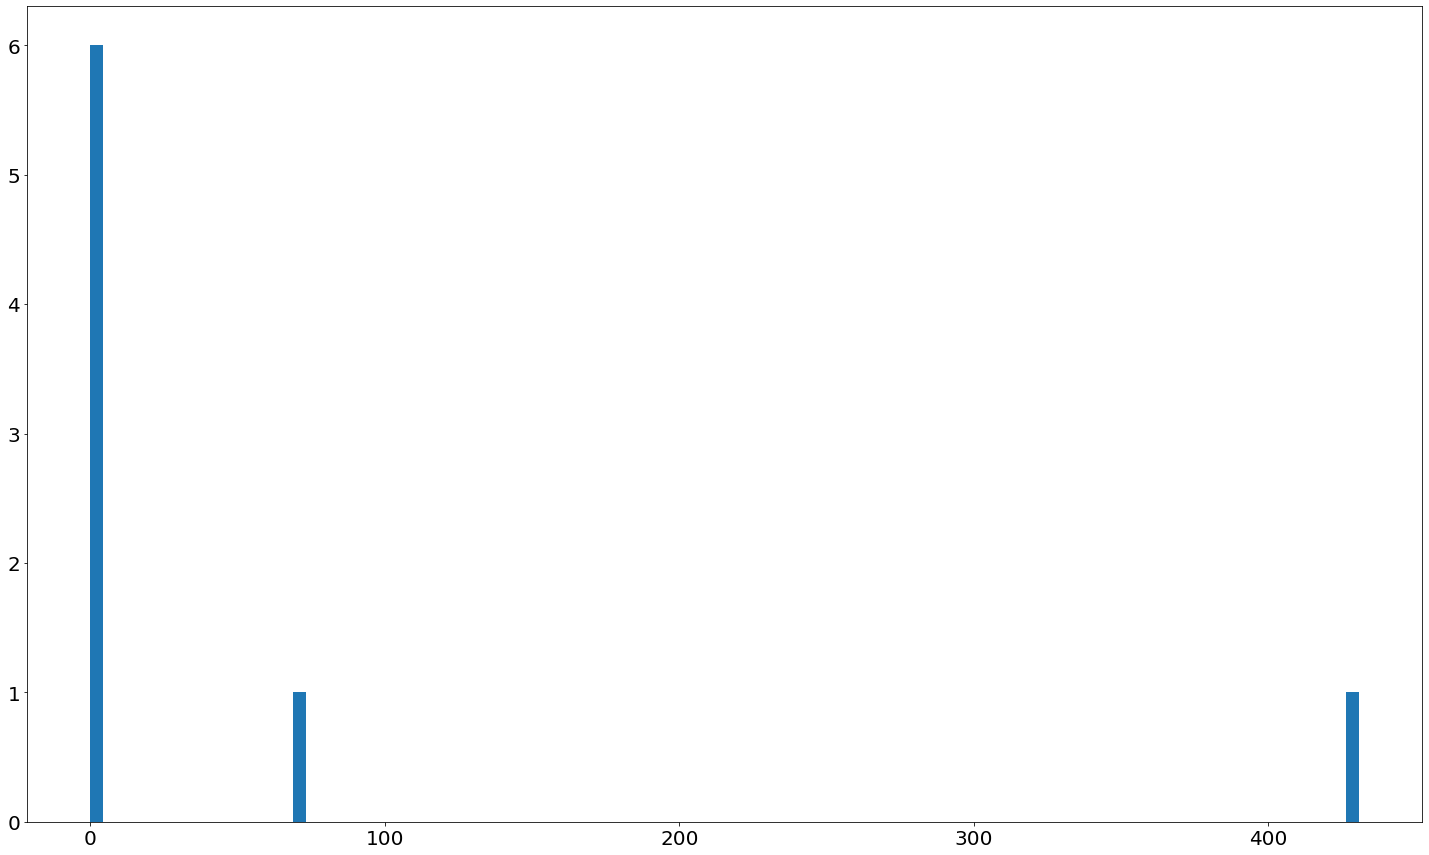

In [18]:
plt.hist(df_neutronsGS.groupby("eventnumber").energydeposition.sum(), bins=100)
plt.show()

In [23]:
df_neutronsGS[df_neutronsGS.PID==2112].kineticenergy

0         1.380010
13        5.722252
16      346.473924
2541    346.473924
2565    837.518037
5437      4.997268
5491     10.203741
5511    160.756038
5514      1.011102
Name: kineticenergy, dtype: float64